### FINAL PROJECT
### Group: Abdelmalek Hajjam, Monu Chacko



# ------------------------------------------------------------------------------------------------------------------


# WE ARE STILL WORKING ON THIS PROJECT. WILL BE COMPLETED BY 12/22

# ---------------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd
import pymysql
import matplotlib.pyplot as plt
import networkx as nx
import operator
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
reddit = pd.read_csv('comments_grp_data.csv',sep=',')
reddit_comment = pd.read_csv('comments_data.csv',sep=';')
users = pd.read_csv('users_data.csv',sep=';')

In [3]:
reddit.loc[0:5]

,author,responder,weight
0,---DevilsAdvocate---,dannybtw,1
1,---DevilsAdvocate---,ThisFreaknGuy,2
2,-Covariance,DomeSlave,1
3,-Mountain-King-,ASK_ABOUT_STEELBEAMS,3
4,-Mountain-King-,AvoidNoiderman,2
5,-Mountain-King-,Bigfrostynugs,1


In [4]:
reddit.shape

(18701, 3)

In [5]:
reddit_comment.shape

(24134, 13)

In [6]:
users.shape

(9928, 3)

In [7]:
# Initialize graph
G = nx.Graph()

# Add nodes
nodes = set(reddit.loc[:, "author"])
nodes.union(set(reddit.loc[:, "responder"]))
nodes = list(nodes)
nodes
G.add_nodes_from(nodes)

# Add edges with weights
# Weight is equal to number of interactions between users
#G.add_edges_from([tuple(x) for x in reddit.loc[:, "author":"responder"].values])
G.add_weighted_edges_from([tuple(x) for x in reddit.values])

C:\Users\moc9029\AppData\Roaming\Python\Python37\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


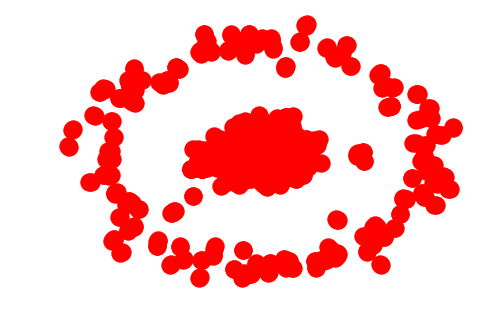

In [8]:
#nx.draw(G)

In [ ]:
#nx.number_of_nodes(G)

In [ ]:
#nx.number_connected_components(G)

In [ ]:
# Ten largest subgraphs
#[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)[0:10]]

In [ ]:
# Select the largest connected subgraph
#G = max(nx.connected_component_subgraphs(G), key=len)
#G.number_of_nodes()

In [ ]:
#nx.diameter(G)

In [ ]:
#nx.average_shortest_path_length(G, weight='weight')

In [ ]:
# Top 10 edges by weight
#for s, t, w in sorted(G.edges(data=True), key=lambda (source,target,data): data['weight'], reverse=True)[0:10]:
#    print(s, t, w)

In [ ]:
'''
The following code was used to calculate centralities during first run
Betweenness centrality takes a long time to calculate 
As such we use saved values for further analysis
'''
# Calculate betweenness centrality
centr_bw = nx.betweenness_centrality(G, weight='weight')

# Calculate degree centrality
centr_deg = nx.degree_centrality(G)

# Combine betweenness and degree centralities into a single data frame
df1 = pd.DataFrame(list(centr_bw.items()), columns=['User', 'Betweenness'])
df2 = pd.DataFrame(list(centr_deg.items()), columns=['User', 'Degree'])
users = df1.join(df2.set_index('User'), on='User')
users.sort_values(['Betweenness', 'Degree'], ascending = False, inplace=True)


users[0:25]

## MPL

In [21]:
#%matplotlib inline
fig = plt.figure(figsize=(18, 18))

main = 'CatNamedJava'

# Select neighbors and neighbors of neighbors
subG = G.neighbors(main)
n_list = subG
print(n_list)
for n in subG:
    print(G.neighbors(n))
    n_list = n_list + G.neighbors(n)

    

<Figure size 1296x1296 with 0 Axes>

In [ ]:
#plt.show()
#nx.write_graphml(G, "rd.graphml")